# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

# Importando dados e bibliotecas

## Importando principais bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset["Time"] = dataset["Time"].apply(lambda x:(x/3600)%24)

## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 60%, 20% e 20%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino e validação serão treinados separadamente nos objetos ``sm_train`` e ``sm_val`` derivados da classe ``SMOTE`` do pacote ``imblearn.over_sampling``.

In [4]:
from imblearn.over_sampling import SMOTE




# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 60%-20%-20%
train_size_nf = int(n_examples_nf*0.6)
val_size_nf = int(n_examples_nf*0.2)
test_size_nf = n_examples_nf - train_size_nf - val_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_val,y_nf_val = X_nf[train_size_nf:train_size_nf+val_size_nf],y_nf[train_size_nf:train_size_nf+val_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf+val_size_nf:],y_nf[train_size_nf+val_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 60%-20%-20%
train_size_f = int(n_examples_f*0.6)
val_size_f = int(n_examples_f*0.2)
test_size_f = n_examples_f - train_size_f - val_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_val,y_f_val = X_f[train_size_f:train_size_f+val_size_f],y_f[train_size_f:train_size_f+val_size_f]
X_f_test,y_f_test = X_f[train_size_f+val_size_f:],y_f[train_size_f+val_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_val = np.concatenate((X_f_val,X_nf_val),axis=0)
y_val = np.concatenate((y_f_val,y_nf_val),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)
sm_val = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)
X_val,y_val = sm_val.fit_resample(X_val,y_val)

y_train = np.expand_dims(y_train,1)
y_val = np.expand_dims(y_val,1)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)
n_examples = train_size + val_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]


np.random.seed(101)
index_shuffling_val = list(range(val_size))
np.random.shuffle(index_shuffling_val)
np.random.seed(None)

X_val,y_val = X_val[index_shuffling_val],y_val[index_shuffling_val]


In [5]:
from sklearn.preprocessing import MinMaxScaler


sc_X = MinMaxScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_val_sc = sc_X.transform(X_val)
X_test_sc = sc_X.transform(X_test)
X_nf_train_sc = sc_X.transform(X_nf_train)
X_nf_val_sc = sc_X.transform(X_nf_val)
X_nf_test_sc = sc_X.transform(X_nf_test)

In [6]:
import torch
import torch.nn as nn




device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

trainX,valX,testX = torch.tensor(X_train_sc),torch.tensor(X_val_sc),torch.tensor(X_test_sc)
trainX,valX,testX = trainX,valX,testX
trainX,valX,testX = trainX.type(torch.float),valX.type(torch.float),testX.type(torch.float)



trainX,valX,testX = trainX.to(device),valX.to(device),testX.to(device)

cpu


In [7]:
n_features = X_train_sc.shape[1]




class Encoder(nn.Module):
    def __init__(self,num_channels_encode,num_channels_out_decode,n_features):
        super(Encoder, self).__init__()
        self.num_channels_encode = num_channels_encode
        self.num_channels_out_decode = num_channels_out_decode
        

        self.n_features = n_features
        

        
        
        self.layer1 =  nn.Sequential(nn.Linear(n_features,self.num_channels_encode[0]),
                        nn.BatchNorm1d(self.num_channels_encode[0]),
                        nn.GELU())

        self.layer2 =  nn.Sequential(nn.Linear(self.num_channels_encode[0],self.num_channels_encode[1]),
                        nn.BatchNorm1d(self.num_channels_encode[1]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.layer3 =  nn.Sequential(nn.Linear(self.num_channels_encode[1],self.num_channels_encode[2]),
                        nn.BatchNorm1d(self.num_channels_encode[2]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.fc = nn.Linear(self.num_channels_encode[2],self.num_channels_encode[2])


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.fc(out)
        return out



class Decoder(nn.Module):
    def __init__(self,num_channels_encode,num_channels_out_decode,n_features):
        super(Decoder, self).__init__()
        self.num_channels_encode = num_channels_encode
        self.num_channels_out_decode = num_channels_out_decode
        

        self.n_features = n_features
        

        self.layer4 =  nn.Sequential(nn.Linear(self.num_channels_encode[2],self.num_channels_out_decode[0]),
                        nn.BatchNorm1d(self.num_channels_out_decode[0]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.layer5 =  nn.Sequential(nn.Linear(self.num_channels_out_decode[0],self.num_channels_out_decode[1]),
                        nn.BatchNorm1d(self.num_channels_out_decode[1]),
                        nn.GELU(),
                        nn.Dropout(0.2))
        

        self.layer6 =  nn.Sequential(nn.Linear(self.num_channels_out_decode[1],self.num_channels_out_decode[2]),
                        nn.BatchNorm1d(self.num_channels_out_decode[2]),
                        nn.GELU(),
                        nn.Dropout(0.2))


        self.fc = nn.Linear(self.num_channels_out_decode[2],self.num_channels_out_decode[2])

    def forward(self, x):
        out = self.layer4(x)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.fc(out)
        return out




class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.num_channels_encode = [70,35,15]
        self.num_channels_out_decode = [35,70,n_features]

        self.n_features = n_features

        self.Encoder = Encoder(self.num_channels_encode,self.num_channels_out_decode,self.n_features)
        self.Decoder = Decoder(self.num_channels_encode,self.num_channels_out_decode,self.n_features)
    


    def forward(self, x):
        out = self.Encoder(x)
        out = self.Decoder(out)
        return out


In [8]:
def train_one_batch(model,optimizer,data,target,loss_f):
    model.train()
    # Aplicando backpropagation
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_f(outputs, target)
    loss.backward()
    optimizer.step()
    return loss

def validate_one_epoch(model,loss_f,val_loader):
    # Val loss
    model.eval()
    list_val_loss = []
    for val_data,val_target in val_loader:
        with torch.no_grad():
            outputs_val = model(val_data)
            loss = loss_f(outputs_val, val_target)
        list_val_loss.append(loss.detach().item())
    mean_loss = np.mean(list_val_loss)
    return mean_loss

In [9]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from time import time
from datetime import timedelta
from tqdm import tqdm

class Datasets(Dataset):
  'Utilizado para gerar os conjuntos de dados no Pytorch'
  def __init__(self, X, y):
        'Initialization'
        self.labels = y
        self.data = X

  def __len__(self):
        'Retorna o número de amostras do conjunto de dados'
        return len(self.labels)

  def __getitem__(self, index):
        'Retorna a amostra correspondente ao índice selecionado'
        # Select sample
        X = self.data[index]
        y = self.labels[index]
        return X, y

def train(model, optimizer, loss_f, num_epochs, batch_size, data_train_x, data_train_y, seed = None, validation=False, patience=5, data_val_x=None, data_val_y=None):
  '''
    train é uma função utilizada no treinamento de redes neurais

    model: o modelo de rede neural utilizada

    optimizer: o otimizador utilizado

    loss_f: a função "loss" utilizada para treinar o modelo

    num_epochs: número de épocas utilizadas no treinamento

    batch_size: tamanho do batch utilizado

    data_train_x: variável de entrada dos dados de treino

    data_train_y: variável de saída dos dados de treino

    seed: fixa a seed inicial. Por padrão irá ser ignorada.
    
    validation: verifica se irá separar parte do conjunto para validação. 
    Se True então separa 80% do conjunto para validação. Caso False não haverá validação.
    patience: patience do EarlyStopping, caso haja validação.

    patience: patience do Early Stopping

    data_val_x: variável de entrada dos dados de validação, utilizado se validation = True

    data_val_y: variável de saída dos dados de validação, utilizado se validation = True
  '''
  
  # Inicializa seed
  gen = torch.Generator()
  if seed:
    np.random.seed(seed)
    random.seed(seed)
    gen.manual_seed(seed)
  
  # Realiza um embaralhamento nos índices
  m = len(data_train_y)
  idx = np.arange(0,m,dtype=int)
  np.random.shuffle(idx)

  

  # Separa a validação se não houver dados de validação e validation==False
  train_size = m
  if validation:
    if data_val_x == None:
      train_size = int(0.8*m)
      val_size = m - train_size
      val_idx = idx[train_size:]
      data_val_x = data_train_x[val_idx]
      data_val_y = data_train_y[val_idx]
      idx = idx[:train_size]
    else:
      val_size = len(data_val_y)
    val_dataset = Datasets(data_val_x,data_val_y)
    val_loader = DataLoader(val_dataset,batch_size=min([val_size,batch_size]))

  
  train_dataset = Datasets(data_train_x[idx],data_train_y[idx])
  train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,generator=gen)

  # Inicia valores da sequência
  val_loss = []
  train_loss = []

  num_batches = train_size//batch_size + 1 if train_size%batch_size>0 else train_size//batch_size
  
  # Inicia os valores de validação val_loss
  if validation:
    # Val loss
    mean_loss = validate_one_epoch(model,loss_f,val_loader)
    val_loss.append(mean_loss.item())
    # parâmetro Exponential Smoothing
    alp = 0.90
    # parâmetro EarlyStopping
    val_min = val_loss[-1]
  
  # Não utilizado se validation==False
  early_stopping = 0

  batch = 0
  
  # Tempo
  initial_time = time()

  # loops épocas e batches
  for epoch in range(num_epochs):
    for data,target in train_loader:
      loss = train_one_batch(model,optimizer,data,target,loss_f)
      train_loss.append(loss.detach().item())

      # Avaliando dados de validação
      if validation:
        # Val loss
        mean_loss = validate_one_epoch(model,loss_f,val_loader)
        val_loss.append(alp*val_loss[-1]+(1-alp)*mean_loss.item())
      
      # Espera pelo menos uma época para iniciar o EarlyStopping
      if (batch>min([num_batches,250])) and validation:
        # Early Stopping 
        if val_loss[-1]>val_min:
          early_stopping += 1
          if early_stopping>=patience:
            break
        else:
          val_min = val_loss[-1]
          early_stopping = 0
      
      batch += 1

      if validation and (batch%100 == 1):
        final_time = time()
        elapsed_time = (final_time - initial_time)
        avg_time = elapsed_time/batch
        delta_time = str(timedelta(seconds=int(elapsed_time)))
        # Formatando string a cada período
        stats_string = "Num. Batches: {batch:d}/{num_batches:d},\t Time Elapsed: {time:s},\t Avg. Time per Batch: {avg_time:1.4f}s,\t Min. Val. Loss: {val_min:1.4f},\t Current Val. Loss: {val_loss:1.4f}"
        print(stats_string.format(batch=batch,num_batches=num_batches*num_epochs,time=delta_time,avg_time=avg_time,val_min=val_min,val_loss=val_loss[-1]))
    
    # Early Stopping epochs loop
    if (validation and early_stopping>=patience):
      break
  
  return [val_loss,train_loss]

In [10]:
import random
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

device = 'cpu'
loss_function = torch.nn.MSELoss()








# Fixando seed para ter reprodutibilidade
seed = 1116567215
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
# Realizando uma escolha dos parâmetros
learning_rate = 1e-2
weight_decay = 1e-5
model_autoencoder = Autoencoder()
num_epochs = 5
batch_size = 256
patience = 20


optimizer = torch.optim.Adam(model_autoencoder.parameters(), lr=learning_rate,weight_decay=weight_decay)


[val_loss,train_loss] = train(model=model_autoencoder, optimizer=optimizer, loss_f=loss_function, num_epochs=num_epochs, batch_size=batch_size, data_train_x=trainX, data_train_y=trainX, validation=True, patience=patience, data_val_x=valX, data_val_y=valX, seed=seed)


# Guardando parâmetros selecionados
params = {'device':device, 'learning_rate':learning_rate,
            'num_epochs':num_epochs,'batch_size':batch_size,
            'weight_decay':weight_decay}




# Guardando performances
testX_pred = model_autoencoder(testX)
valX_pred = model_autoencoder(valX)

testX_pred = testX_pred.data.numpy()
valX_pred = valX_pred.data.numpy()





Results = {'RMSE val.':np.sqrt(mean_squared_error(valX.reshape(-1),valX_pred.reshape(-1))),
                    'RMSE':np.sqrt(mean_squared_error(testX.reshape(-1),testX_pred.reshape(-1))),
                    'MAE':mean_absolute_error(testX.reshape(-1),testX_pred.reshape(-1))}




display(Results)
display(params)

Num. Batches: 1/6665,	 Time Elapsed: 0:00:02,	 Avg. Time per Batch: 2.2952s,	 Min. Val. Loss: 0.3113,	 Current Val. Loss: 0.3101
Num. Batches: 101/6665,	 Time Elapsed: 0:03:49,	 Avg. Time per Batch: 2.2727s,	 Min. Val. Loss: 0.3113,	 Current Val. Loss: 0.0051


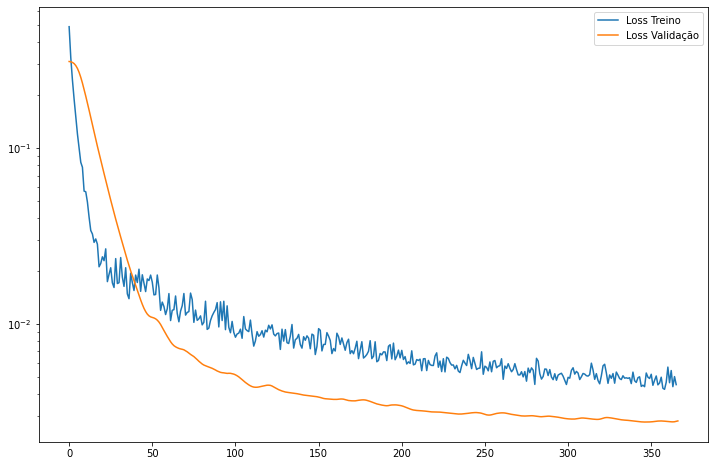

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train_loss,label='Loss Treino')
plt.plot(val_loss,label='Loss Validação')
plt.yscale('log')
plt.legend()
plt.show()

Vemos que os dados de validação tem um desempenho melhor. Isso provavelmente se deve à diferença entre o comportamento do estado ``model.eval()``, que desliga o Dropout no nosso modelo, e o estado ``model.train()`` que tem o funcionamento dado na criação do modelo.

In [ ]:
PATH = 'autoencoder.ptc'
final_model = model_autoencoder.to('cpu')
torch.save(final_model.state_dict(), PATH)
model_autoencoder = model_autoencoder.to(device)

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

trainX,valX,testX = torch.tensor(X_train_sc),torch.tensor(X_val_sc),torch.tensor(X_test_sc)
trainX,valX,testX = trainX,valX,testX
trainX,valX,testX = trainX.type(torch.float),valX.type(torch.float),testX.type(torch.float)


trainY,valY,testY = torch.tensor(y_train).squeeze(1),torch.tensor(y_val).squeeze(1),torch.tensor(y_test).squeeze(1)
trainY,valY,testY = trainY.type(torch.LongTensor),valY.type(torch.LongTensor),testY.type(torch.LongTensor)


trainX,valX,testX = trainX.to(device),valX.to(device),testX.to(device)
trainY,valY,testY = trainY.to(device),valY.to(device),testY.to(device)

cpu


In [ ]:
model_autoencoder.eval()
trainX_autoencoder = model_autoencoder.Encoder(trainX)

testX_autoencoder = model_autoencoder.Encoder(testX)


valX_autoencoder = model_autoencoder.Encoder(valX)
print(valX_autoencoder)
X_val_sc_pred = valX_autoencoder.cpu().data.numpy()


trainX_autoencoder,testX_autoencoder,valX_autoencoder = trainX_autoencoder.to(device),testX_autoencoder.to(device),valX_autoencoder.to(device)

tensor([[ 0.0344, -0.0954, -0.0440,  ...,  0.0653,  0.0103,  0.1189],
        [ 0.3297, -0.1377,  0.1309,  ...,  0.1211, -0.1131,  0.3193],
        [-0.7543, -1.0010,  0.9847,  ..., -1.6924,  0.5268, -1.1777],
        ...,
        [ 0.1661,  0.0109, -0.0837,  ...,  0.2239,  0.0051,  0.3987],
        [-1.2669, -0.6587,  0.6739,  ..., -1.3995,  0.5839, -1.4360],
        [ 0.1544,  0.1459, -0.1328,  ...,  0.2600,  0.0717,  0.4780]],
       grad_fn=<AddmmBackward0>)


In [ ]:
trainX_autoencoder = trainX_autoencoder.detach()
valX_autoencoder = valX_autoencoder.detach()
testX_autoencoder = testX_autoencoder.detach()

In [ ]:
from tqdm import tqdm


n_features = trainX_autoencoder.shape[1]



class Classification_NN(nn.Module):
    def __init__(self,n_features,num_hidden_layers,num_neurons):
        super(Classification_NN, self).__init__()

        self.input_sizes = []

        for i in range(num_hidden_layers):
          self.input_sizes.append(   int(1.5*num_neurons)   )

        self.output_sizes = self.input_sizes[1:]
        self.output_sizes.append(n_features)

        self.n_features = n_features

        self.num_hidden_layers = num_hidden_layers

        self.layer0 = nn.Sequential(nn.Linear(n_features,self.input_sizes[0]),
                        nn.BatchNorm1d(self.input_sizes[0]),
                        nn.GELU(),
                        nn.Dropout(0.25))

        self.layers = nn.ModuleList([])
        for i in range(num_hidden_layers):
          self.layers.append(nn.Sequential(nn.Linear(self.input_sizes[i],self.output_sizes[i]),
                        nn.BatchNorm1d(self.output_sizes[i]),
                        nn.GELU(),
                        nn.Dropout(0.25)))
        

        self.fc = nn.Linear(self.output_sizes[-1], 2)


    def forward(self, x):
        out = self.layer0(x)
        for layer in self.layers:
          out = layer(out)
        out = self.fc(out)
        return out

In [ ]:
# Fixando seed para ter reprodutibilidade
seed = 1116567215
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
# Realizando uma escolha dos parâmetros
learning_rate = 2e-3
weight_decay = 5e-5
num_epochs = 5
batch_size = 512
patience = 10

n_iter = 25
seeds = []
for i in range(n_iter):
    seeds.append(np.random.randint(0,2**31-1))
hyperparams = {}
validation_loss = []
num_hidden_layers = 2
dict_ = {}
for i,seed in enumerate(seeds):
    print(f"Model {i+1}")
    num_neurons = int(n_features*(1+2*np.random.rand()))
    num_hidden_layers = int(2*np.random.rand() + 2)

    model_classifier = Classification_NN(n_features,num_hidden_layers,num_neurons)

    loss_function = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.,2.]))

    optimizer = torch.optim.Adam(model_classifier.parameters(), lr=learning_rate,weight_decay=weight_decay)

    [val_loss,train_loss] = train(model=model_classifier, optimizer=optimizer, loss_f=loss_function, num_epochs=num_epochs, 
                                    batch_size=batch_size, data_train_x=trainX, data_train_y=trainY, validation=True, 
                                    patience=patience, data_val_x=valX, data_val_y=valY, seed=seed)

    hyperparams.update({i:{"Hidden Layers":num_hidden_layers,
                        "Num. Neurons":num_neurons}})
    validation_loss.append([val_loss[0],val_loss[-1]])

In [ ]:
# # Fixando seed para ter reprodutibilidade
# seed = 1116567215
# np.random.seed(seed)
# random.seed(seed)
# torch.manual_seed(seed)
# # Realizando uma escolha dos parâmetros
# learning_rate = 1e-2
# weight_decay = 1e-5
# num_epochs = 5
# batch_size = 256
# patience = 10


# hyperparams = {}
# validation_loss = []
# num_hidden_layers = 2

# num_neurons = int(1.5*n_features)


# model_classifier = Classification_NN(n_features,num_hidden_layers,num_neurons)


# loss_function = torch.nn.CrossEntropyLoss()


# optimizer = torch.optim.Adam(model_classifier.parameters(), lr=learning_rate,weight_decay=weight_decay)


# [val_loss,train_loss] = train(model=model_classifier, optimizer=optimizer, loss_f=loss_function, num_epochs=num_epochs, batch_size=batch_size, data_train_x=trainX_autoencoder, data_train_y=trainY, validation=True, patience=patience, data_val_x=valX_autoencoder, data_val_y=valY, seed=seed)

# hyperparams.update({"Hidden Layers":num_hidden_layers,
#                     "Num. Neurons":num_neurons})
# validation_loss.append(val_loss[-1])

Num. Batches: 1/6665,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.7189s,	 Min. Val. Loss: 0.6955,	 Current Val. Loss: 0.6948
Num. Batches: 101/6665,	 Time Elapsed: 0:02:33,	 Avg. Time per Batch: 1.5209s,	 Min. Val. Loss: 0.6955,	 Current Val. Loss: 0.2011
Num. Batches: 201/6665,	 Time Elapsed: 0:05:00,	 Avg. Time per Batch: 1.4938s,	 Min. Val. Loss: 0.6955,	 Current Val. Loss: 0.1921


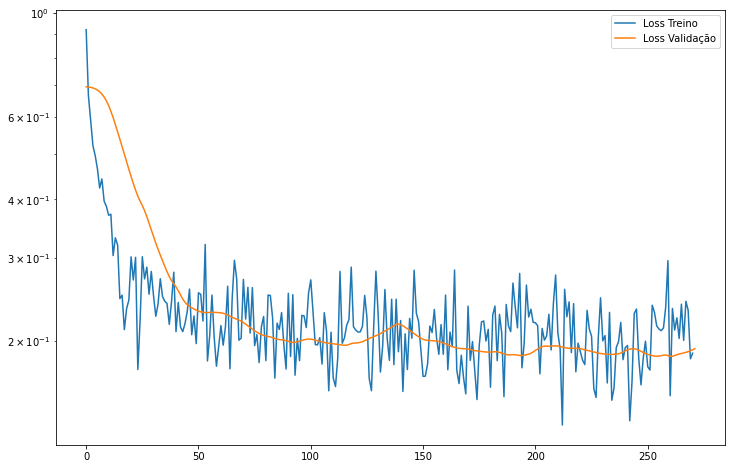

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train_loss,label='Loss Treino')
plt.plot(val_loss,label='Loss Validação')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
PATH = 'classifier.ptc'
final_model = model_classifier.to('cpu')
torch.save(final_model.state_dict(), PATH)
model_classifier = model_classifier.to(device)

In [ ]:
val_prob = model_classifier(valX_autoencoder)
val_prob = torch.softmax(val_prob,dim=1)
val_prob = val_prob[:,1]
val_prob = val_prob.detach().data.numpy()




test_prob = model_classifier(testX_autoencoder)
test_prob = torch.softmax(test_prob,dim=1)
test_prob = test_prob[:,1]
test_prob = test_prob.detach().data.numpy()

In [ ]:
# Métricas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = (test_prob>=0.5)

# Resultados dos dados de teste
Results.update({
                'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()
                })


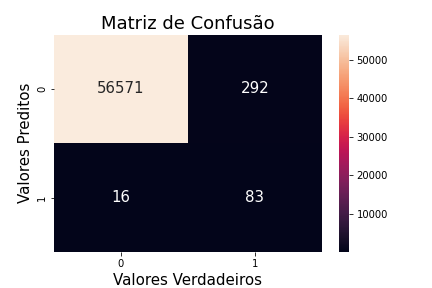

In [ ]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

html += f'<h2>CNN</h2>'

# Apresentando o desempenho nos dados de validação e teste
val_test = ('Test',)
n_cols = len(val_test)
for sufix in val_test:
    html += '\n<div>\n'
    html += f'<h3>{sufix}:</h3>\n'
    results_dict = Results#[f"{model} {sufix}"]
    html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
    html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
    html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
    html += '<p>Matriz de Confusão:</p>\n'

    fig = plt.figure()
    ax = plt.gca()
    sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
    ax.set_title('Matriz de Confusão',fontsize=18)
    ax.set_xlabel('Valores Verdadeiros',fontsize=15)
    ax.set_ylabel('Valores Preditos',fontsize=15)
    fig.patch.set_alpha(1.0)
    
    tmpfile = BytesIO()
    fig.savefig(tmpfile)
    encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
    html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
    html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_test1.html','w',encoding='utf-8') as f:
  f.write(html)

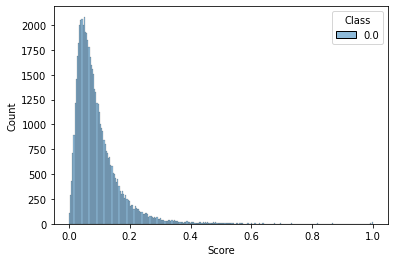

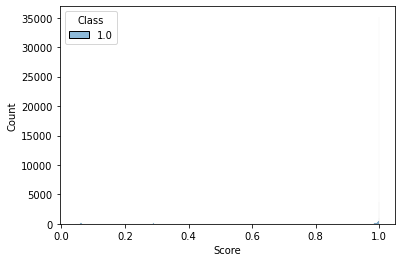

In [ ]:
# Score (Não-Fraude)
val_prob_nf = val_prob[y_val.ravel()==0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")


# Score (Fraude)
val_prob_f = val_prob[y_val.ravel()==1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")


# Concatenando dados em um dataframe
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Score","Class"])

# Plotando Scores por classe
sns.histplot(data=data[data["Class"] == 0], x="Score", hue="Class")
plt.show()

sns.histplot(data=data[data["Class"] == 1], x="Score", hue="Class")
plt.show()

### Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



#### G-Mean

O método G-Mean encontra a limiar maximizando a média geométrica entre a taxa de verdadeiros positivos e a taxa de verdadeiros negativos.

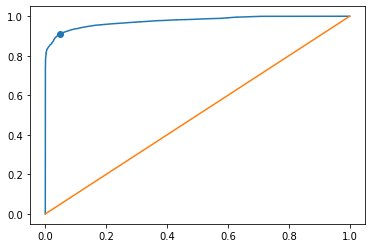

Best Threshold: 0.2366
Area Under the Curve: 0.9754


In [ ]:
from sklearn.metrics import roc_curve

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [ ]:
# Realizando as previsões para os dados de teste e validação
y_val_pred_gmean = (val_prob>=threshold)


y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9309


,precision,recall,f1-score,support
0.0,0.913093,0.952482,0.932372,56863.000000
1.0,0.950340,0.909344,0.929390,56863.000000
accuracy,0.930913,0.930913,0.930913,0.930913
macro avg,0.931716,0.930913,0.930881,113726.000000
weighted avg,0.931716,0.930913,0.930881,113726.000000


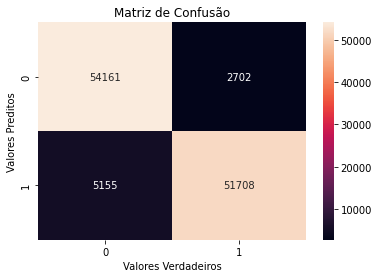

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Utilizando as balanced accuracy, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")

print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_gmean))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9109


,precision,recall,f1-score,support
0.0,0.999760,0.953080,0.975862,56863.000000
1.0,0.031227,0.868687,0.060287,99.000000
accuracy,0.952934,0.952934,0.952934,0.952934
macro avg,0.515494,0.910884,0.518075,56962.000000
weighted avg,0.998077,0.952934,0.974271,56962.000000


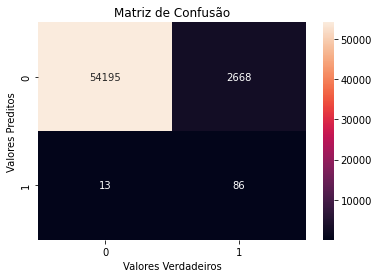

In [ ]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_gmean))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Balanced Accuracy

O método Balanced Accuracy encontra a limiar maximizando a quantidade Balanced Accuracy.

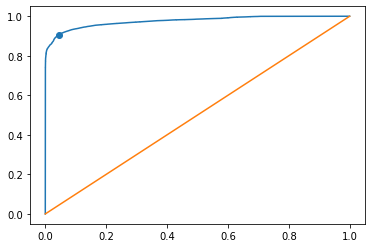

Best Threshold: 0.2419
Area Under the Curve: 0.9754


In [ ]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Neste caso vamos maximizar o Balanced Accuracy
balanced_accuracies = (tpr+(1-fpr))*0.5


# Encontrando o limiar com maior valor de Balanced Accuracy
j_max = balanced_accuracies.argmax()

threshold = thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [ ]:
# Realizando as previsões para o limiar encontrado
y_val_pred_bal_acc = (val_prob>=threshold)


y_test_pred_bal_acc = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9310


,precision,recall,f1-score,support
0.0,0.910914,0.955384,0.932619,56863.000000
1.0,0.953094,0.906565,0.929247,56863.000000
accuracy,0.930974,0.930974,0.930974,0.930974
macro avg,0.932004,0.930974,0.930933,113726.000000
weighted avg,0.932004,0.930974,0.930933,113726.000000


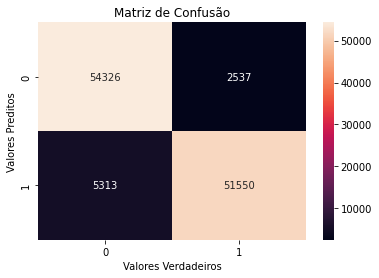

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_bal_acc))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9124


,precision,recall,f1-score,support
0.0,0.999761,0.956052,0.977418,56863.0000
1.0,0.033269,0.868687,0.064083,99.0000
accuracy,0.955900,0.955900,0.955900,0.9559
macro avg,0.516515,0.912370,0.520751,56962.0000
weighted avg,0.998081,0.955900,0.975831,56962.0000


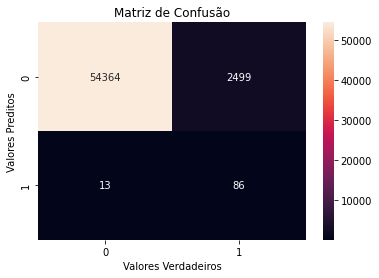

In [ ]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_bal_acc))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

Aqui podemos notar que encontrar os parâmetros através do Balanced Accuracy aumenta levemente o número de fraudes erradas, porém balanceia com uma redução significativa das não-fraudes.

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.

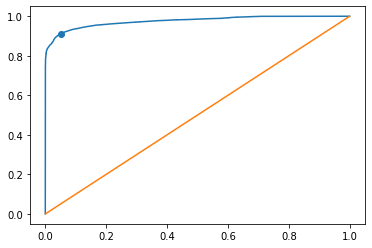

Best Threshold: 0.2327
Area Under the Curve: 0.9754


In [ ]:
val_prob_nf = val_prob[y_val.ravel() == 0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")
val_prob_f = val_prob[y_val.ravel() == 1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Distances","Class"])

threshold = np.quantile(val_prob_nf,.95)


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [ ]:
# Realizando as previsões para o limiar encontrado
y_val_pred_percentile = (val_prob>=threshold)


y_test_pred_percentile = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9306


,precision,recall,f1-score,support
0.0,0.914584,0.949985,0.931949,56863.000000
1.0,0.947971,0.911278,0.929262,56863.000000
accuracy,0.930632,0.930632,0.930632,0.930632
macro avg,0.931278,0.930632,0.930606,113726.000000
weighted avg,0.931278,0.930632,0.930606,113726.000000


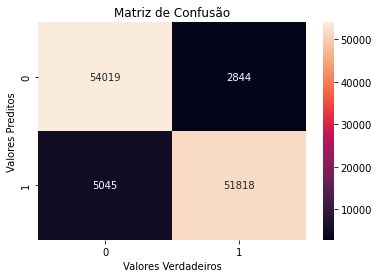

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_percentile))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9096


,precision,recall,f1-score,support
0.0,0.999760,0.950583,0.974551,56863.000000
1.0,0.029696,0.868687,0.057429,99.000000
accuracy,0.950441,0.950441,0.950441,0.950441
macro avg,0.514728,0.909635,0.515990,56962.000000
weighted avg,0.998074,0.950441,0.972957,56962.000000


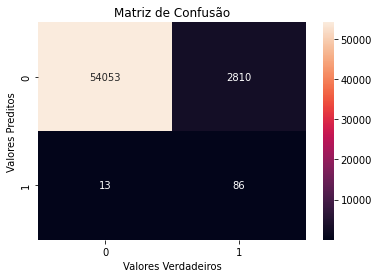

In [ ]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_percentile))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### Conclusões para ANN

*************************   Dados de Teste   *************************


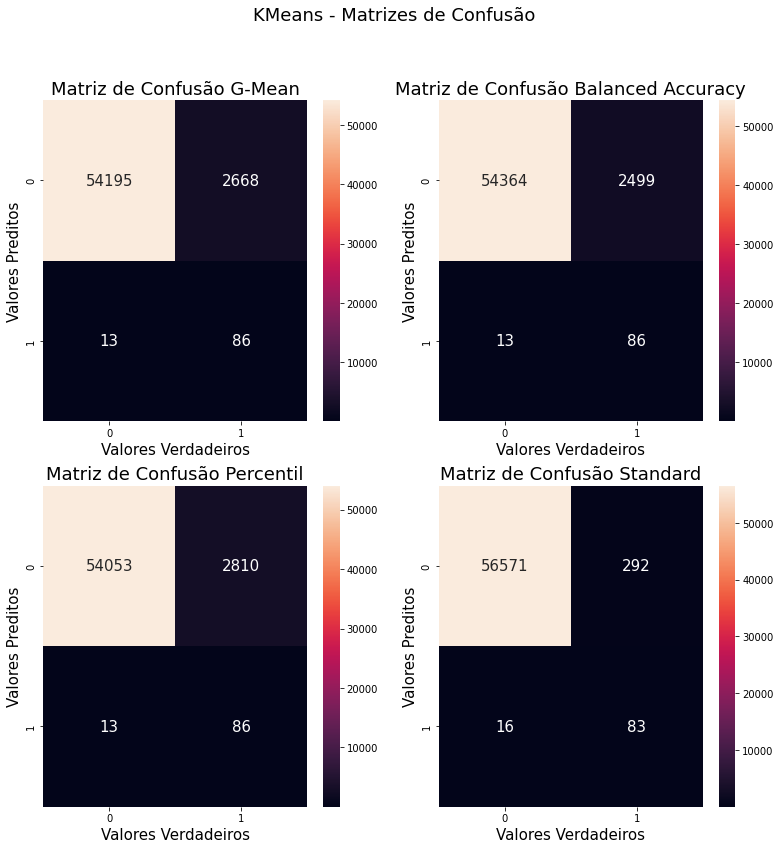

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import json

num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(2,2)
fig.set_size_inches(6.5*2,6.5*2)
axes = axes.ravel()

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão G-Mean',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# Balanced Accuracy
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Balanced Accuracy',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)



# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Percentil',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)


y_test_pred_std = (test_prob>=0.5)

# Percentil
ax = axes[3]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Standard',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)

fig.suptitle("KMeans - Matrizes de Confusão",fontsize=18)


AUC_ROC = roc_auc_score(y_test,test_prob)


average_precision = average_precision_score(y_test,test_prob)




performance = {"AUC ROC":AUC_ROC,"Average Precision": average_precision,
                "Classification Report G-Mean":classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True),
                "Classification Report Balanced Accuracy":classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True),
                "Classification Report Percentil":classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)}
with open("performance/performance_ANN.json","w",encoding="utf-8") as f:
    json.dump(performance,f)


fig.patch.set_alpha(1.0)
fig.savefig('figures/part3/confusion_matrix_ANN.pdf', bbox_inches='tight')
fig.savefig('figures/part3/confusion_matrix_ANN.png', bbox_inches='tight')
plt.show()

Aparentemente a melhor métrica para avaliar o limiar é o Percentil ou o Balanced Accuracy, dependendo da perspectiva de negócio.

Na realidade o número de falsos positivos é bastante sensível ao limiar, para aumentar em uma unidade o número fraudes preditas corretamente (verdadeiros positivos), abrimos mão de muitas transações que serão avaliadas incorretamente. Ou seja, com o modelo utilizado, para evitar que uma transação a mais seja fraudada, eventualmente devemos bloquear diversas transações, nesse caso devemos ver qual é o melhor resultado.

In [194]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from time import time
from datetime import timedelta
from tqdm import tqdm

class Datasets(Dataset):
  'Utilizado para gerar os conjuntos de dados no Pytorch'
  def __init__(self, X, y):
        'Initialization'
        self.labels = y
        self.data = X

  def __len__(self):
        'Retorna o número de amostras do conjunto de dados'
        return len(self.labels)

  def __getitem__(self, index):
        'Retorna a amostra correspondente ao índice selecionado'
        # Select sample
        X = self.data[index]
        y = self.labels[index]
        return X, y

def train(model, optimizer, loss_f, num_epochs, batch_size, data_train_x, data_train_y, seed = None, validation=False, patience=5, data_val_x=None, data_val_y=None):
  '''
    train é uma função utilizada no treinamento de redes neurais

    model: o modelo de rede neural utilizada

    optimizer: o otimizador utilizado

    loss_f: a função "loss" utilizada para treinar o modelo

    num_epochs: número de épocas utilizadas no treinamento

    batch_size: tamanho do batch utilizado

    data_train_x: variável de entrada dos dados de treino

    data_train_y: variável de saída dos dados de treino

    seed: fixa a seed inicial. Por padrão irá ser ignorada.
    
    validation: verifica se irá separar parte do conjunto para validação. 
    Se True então separa 80% do conjunto para validação. Caso False não haverá validação.
    patience: patience do EarlyStopping, caso haja validação.

    patience: patience do Early Stopping

    data_val_x: variável de entrada dos dados de validação, utilizado se validation = True

    data_val_y: variável de saída dos dados de validação, utilizado se validation = True
  '''
  
  # Inicializa seed
  gen = torch.Generator()
  if seed:
    np.random.seed(seed)
    random.seed(seed)
    gen.manual_seed(seed)
  
  # Realiza um embaralhamento nos índices
  m = len(data_train_y)
  idx = np.arange(0,m,dtype=int)
  np.random.shuffle(idx)

  # Separa a validação se não houver dados de validação e validation==False
  train_size = m
  if validation:
    if data_val_x == None:
      train_size = int(0.8*m)
      val_size = m - train_size
      val_idx = idx[train_size:]
      data_val_x = data_train_x[val_idx]
      data_val_y = data_train_y[val_idx]
      idx = idx[:train_size]
    else:
      val_size = len(data_val_y)
    val_dataset = Datasets(data_val_x,data_val_y)
    val_loader = DataLoader(val_dataset,batch_size=min([val_size,batch_size]))

  
  train_dataset = Datasets(data_train_x[idx],data_train_y[idx])
  train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,generator=gen)

  # Inicia valores da sequência
  val_loss = []
  train_loss = []

  num_batches = train_size//batch_size + 1 if train_size%batch_size>0 else train_size//batch_size
  
  # Inicia os valores de validação val_loss
  if validation:
    # Val loss
    mean_loss = validate_one_epoch(model,loss_f,val_loader)
    val_loss.append(mean_loss.item())
    # parâmetro Exponential Smoothing
    alp = 0.90
    # parâmetro EarlyStopping
    val_min = val_loss[-1]
  
  # Não utilizado se validation==False
  early_stopping = 0

  batch = 0
  
  # Tempo
  initial_time = time()

  # loops épocas e batches
  for epoch in range(num_epochs):
    for data,target in train_loader:
      loss = train_one_batch(model,optimizer,data,target,loss_f)
      train_loss.append(loss.detach().item())

      # Avaliando dados de validação
      if validation:
        # Val loss
        mean_loss = validate_one_epoch(model,loss_f,val_loader)
        val_loss.append(alp*val_loss[-1]+(1-alp)*mean_loss.item())
      
      # Espera pelo menos uma época para iniciar o EarlyStopping
      if (batch>min([num_batches,0])) and validation:
        # Early Stopping 
        if val_loss[-1]>val_min:
          early_stopping += 1
          if early_stopping>=patience:
            break
        else:
          val_min = val_loss[-1]
          early_stopping = 0
      
      batch += 1

      if validation and (batch%15 == 1):
        final_time = time()
        elapsed_time = (final_time - initial_time)
        avg_time = elapsed_time/batch
        delta_time = str(timedelta(seconds=int(elapsed_time)))
        # Formatando string a cada período
        stats_string = "Num. Batches: {batch:d}/{num_batches:d},\t Time Elapsed: {time:s},\t Avg. Time per Batch: {avg_time:1.4f}s,\t Min. Val. Loss: {val_min:1.4f},\t Current Val. Loss: {val_loss:1.4f}"
        print(stats_string.format(batch=batch,num_batches=num_batches*num_epochs,time=delta_time,avg_time=avg_time,val_min=val_min,val_loss=val_loss[-1]))
    
    # Early Stopping epochs loop
    if (validation and early_stopping>=patience):
      break
  
  return [val_loss,train_loss]

In [195]:
n_features = trainX.shape[1]



class Classification_NN(nn.Module):
    def __init__(self,n_features,num_hidden_layers,num_neurons):
        super(Classification_NN, self).__init__()

        self.input_sizes = []

        for i in range(num_hidden_layers):
          self.input_sizes.append(   int(1.5*num_neurons)   )

        self.output_sizes = self.input_sizes[1:]
        self.output_sizes.append(n_features)

        self.n_features = n_features

        self.num_hidden_layers = num_hidden_layers

        self.layer0 = nn.Sequential(nn.Linear(n_features,self.input_sizes[0]),
                        nn.BatchNorm1d(self.input_sizes[0]),
                        nn.GELU(),
                        nn.Dropout(0.25))

        self.layers = nn.ModuleList([])
        for i in range(num_hidden_layers):
          self.layers.append(nn.Sequential(nn.Linear(self.input_sizes[i],self.output_sizes[i]),
                        nn.BatchNorm1d(self.output_sizes[i]),
                        nn.GELU(),
                        nn.Dropout(0.25)))
        

        self.fc = nn.Linear(self.output_sizes[-1], 2)


    def forward(self, x):
        out = self.layer0(x)
        for layer in self.layers:
          out = layer(out)
        out = self.fc(out)
        return out

In [200]:
# Fixando seed para ter reprodutibilidade
seed = 1116567215
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
# Realizando uma escolha dos parâmetros
learning_rate = 2e-3
weight_decay = 5e-5
num_epochs = 5
batch_size = 512
patience = 10

n_iter = 25
seeds = []
for i in range(n_iter):
    seeds.append(np.random.randint(0,2**31-1))
hyperparams = {}
validation_loss = []
num_hidden_layers = 2
dict_ = {}
for i,seed in enumerate(seeds):
    print(f"Model {i+1}")
    num_neurons = int(n_features*(1+2*np.random.rand()))
    num_hidden_layers = int(2*np.random.rand() + 2)

    model_classifier = Classification_NN(n_features,num_hidden_layers,num_neurons)

    loss_function = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.,2.]))

    optimizer = torch.optim.Adam(model_classifier.parameters(), lr=learning_rate,weight_decay=weight_decay)

    [val_loss,train_loss] = train(model=model_classifier, optimizer=optimizer, loss_f=loss_function, num_epochs=num_epochs, 
                                    batch_size=batch_size, data_train_x=trainX, data_train_y=trainY, validation=True, 
                                    patience=patience, data_val_x=valX, data_val_y=valY, seed=seed)

    hyperparams.update({i:{"Hidden Layers":num_hidden_layers,
                        "Num. Neurons":num_neurons}})
    validation_loss.append([val_loss[0],val_loss[-1]])

Num. Batches: 1/3335,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.7489s,	 Min. Val. Loss: 0.6924,	 Current Val. Loss: 0.6924
Num. Batches: 101/3335,	 Time Elapsed: 0:02:28,	 Avg. Time per Batch: 1.4705s,	 Min. Val. Loss: 0.1089,	 Current Val. Loss: 0.1089
Num. Batches: 1/3335,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.4051s,	 Min. Val. Loss: 0.6681,	 Current Val. Loss: 0.6682
Num. Batches: 1/3335,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.4341s,	 Min. Val. Loss: 0.7047,	 Current Val. Loss: 0.7049
Num. Batches: 1/3335,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.6800s,	 Min. Val. Loss: 0.7229,	 Current Val. Loss: 0.7229
Num. Batches: 1/3335,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.5940s,	 Min. Val. Loss: 0.7084,	 Current Val. Loss: 0.7083
Num. Batches: 101/3335,	 Time Elapsed: 0:02:32,	 Avg. Time per Batch: 1.5110s,	 Min. Val. Loss: 0.1021,	 Current Val. Loss: 0.1021
Num. Batches: 1/3335,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.4531s,	 Min. Val. Loss:

KeyboardInterrupt: 

In [201]:
pd.DataFrame(validation_loss,columns=["Start","End"])

,Start,End
0,0.692364,0.115121
1,0.668110,0.675130
2,0.704702,0.712192
3,0.722903,0.116798
4,0.708390,0.098683
5,0.653130,0.216861
6,0.699499,0.125803
7,0.690316,0.691689
8,0.684072,0.100785
9,0.688509,0.690273


In [202]:
pd.DataFrame(hyperparams).T

,Hidden Layers,Num. Neurons
0,2,58
1,3,51
2,2,37
3,3,88
4,2,81
5,2,42
6,2,35
7,3,76
8,3,35
9,2,78


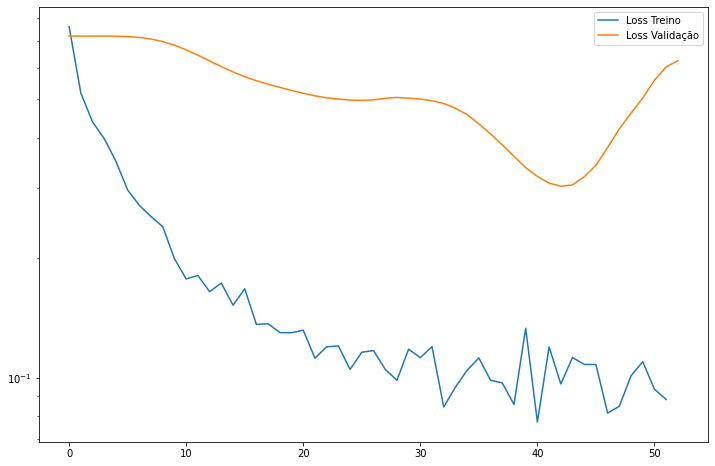

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(train_loss,label='Loss Treino')
plt.plot(val_loss,label='Loss Validação')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
val_prob = model_classifier(valX)
val_prob = torch.softmax(val_prob,dim=1)
val_prob = val_prob[:,1]
val_prob = val_prob.detach().data.numpy()




test_prob = model_classifier(testX)
test_prob = torch.softmax(test_prob,dim=1)
test_prob = test_prob[:,1]
test_prob = test_prob.detach().data.numpy()

In [ ]:
y_pred = (test_prob>=0.5)

# Resultados dos dados de teste
Results.update({
                'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()
                })


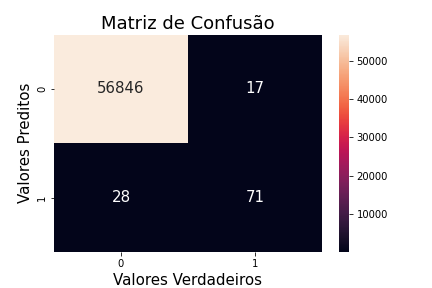

In [ ]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

html += f'<h2>CNN</h2>'

# Apresentando o desempenho nos dados de validação e teste
val_test = ('Test',)
n_cols = len(val_test)
for sufix in val_test:
    html += '\n<div>\n'
    html += f'<h3>{sufix}:</h3>\n'
    results_dict = Results#[f"{model} {sufix}"]
    html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
    html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
    html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
    html += '<p>Matriz de Confusão:</p>\n'

    fig = plt.figure()
    ax = plt.gca()
    sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
    ax.set_title('Matriz de Confusão',fontsize=18)
    ax.set_xlabel('Valores Verdadeiros',fontsize=15)
    ax.set_ylabel('Valores Preditos',fontsize=15)
    fig.patch.set_alpha(1.0)
    
    tmpfile = BytesIO()
    fig.savefig(tmpfile)
    encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
    html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
    html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_test1.html','w',encoding='utf-8') as f:
  f.write(html)

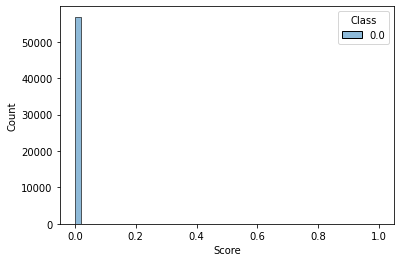

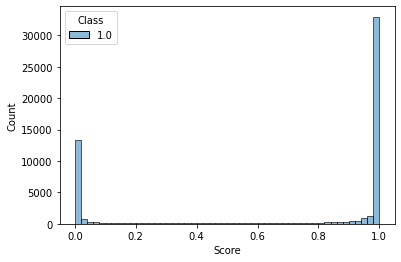

In [132]:
# Score (Não-Fraude)
val_prob_nf = val_prob[y_val.ravel()==0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")


# Score (Fraude)
val_prob_f = val_prob[y_val.ravel()==1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")


# Concatenando dados em um dataframe
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Score","Class"])

# Plotando Scores por classe
sns.histplot(data=data[data["Class"] == 0], x="Score", hue="Class",bins=50)
plt.show()

sns.histplot(data=data[data["Class"] == 1], x="Score", hue="Class",bins=50)
plt.show()

### Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



#### G-Mean

O método G-Mean encontra a limiar maximizando a média geométrica entre a taxa de verdadeiros positivos e a taxa de verdadeiros negativos.

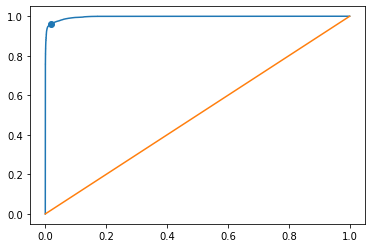

Best Threshold: 0.0240
Area Under the Curve: 0.9970


In [113]:
from sklearn.metrics import roc_curve

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [114]:
# Realizando as previsões para os dados de teste e validação
y_val_pred_gmean = (val_prob>=threshold)


y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9715


,precision,recall,f1-score,support
0.0,0.961319,0.982519,0.971804,56863.000000
1.0,0.982125,0.960466,0.971175,56863.000000
accuracy,0.971493,0.971493,0.971493,0.971493
macro avg,0.971722,0.971493,0.971489,113726.000000
weighted avg,0.971722,0.971493,0.971489,113726.000000


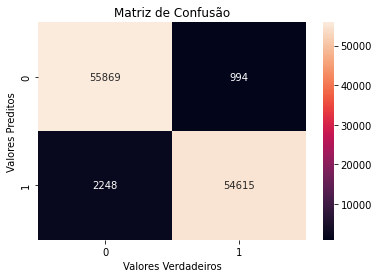

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# Utilizando as balanced accuracy, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")

print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_gmean))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9309


,precision,recall,f1-score,support
0.0,0.999785,0.982941,0.991292,56863.00000
1.0,0.082308,0.878788,0.150519,99.00000
accuracy,0.982760,0.982760,0.982760,0.98276
macro avg,0.541047,0.930865,0.570905,56962.00000
weighted avg,0.998191,0.982760,0.989831,56962.00000


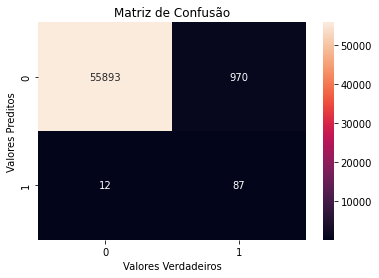

In [116]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_gmean))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Balanced Accuracy

O método Balanced Accuracy encontra a limiar maximizando a quantidade Balanced Accuracy.

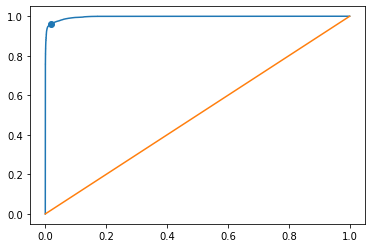

Best Threshold: 0.0242
Area Under the Curve: 0.9970


In [117]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Neste caso vamos maximizar o Balanced Accuracy
balanced_accuracies = (tpr+(1-fpr))*0.5


# Encontrando o limiar com maior valor de Balanced Accuracy
j_max = balanced_accuracies.argmax()

threshold = thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [118]:
# Realizando as previsões para o limiar encontrado
y_val_pred_bal_acc = (val_prob>=threshold)


y_test_pred_bal_acc = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9715


,precision,recall,f1-score,support
0.0,0.961256,0.982590,0.971806,56863.000000
1.0,0.982195,0.960396,0.971173,56863.000000
accuracy,0.971493,0.971493,0.971493,0.971493
macro avg,0.971725,0.971493,0.971489,113726.000000
weighted avg,0.971725,0.971493,0.971489,113726.000000


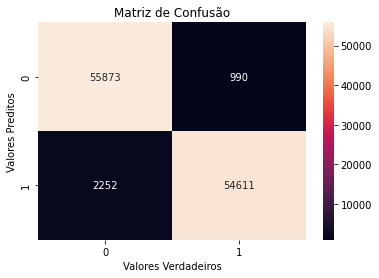

In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_bal_acc))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9309


,precision,recall,f1-score,support
0.0,0.999785,0.982994,0.991319,56863.000000
1.0,0.082543,0.878788,0.150911,99.000000
accuracy,0.982813,0.982813,0.982813,0.982813
macro avg,0.541164,0.930891,0.571115,56962.000000
weighted avg,0.998191,0.982813,0.989858,56962.000000


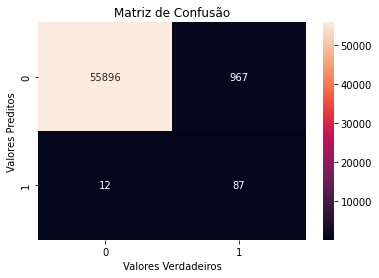

In [120]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_bal_acc))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

Aqui podemos notar que encontrar os parâmetros através do Balanced Accuracy aumenta levemente o número de fraudes erradas, porém balanceia com uma redução significativa das não-fraudes.

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.

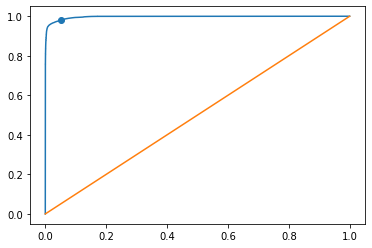

Best Threshold: 0.0018
Area Under the Curve: 0.9970


In [121]:
val_prob_nf = val_prob[y_val.ravel() == 0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")
val_prob_f = val_prob[y_val.ravel() == 1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Distances","Class"])

threshold = np.quantile(val_prob_nf,.95)


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [122]:
# Realizando as previsões para o limiar encontrado
y_val_pred_percentile = (val_prob>=threshold)


y_test_pred_percentile = (test_prob>=threshold)

**************Dados de Validação**************

Balanced Accuracy score: 0.9648


,precision,recall,f1-score,support
0.0,0.978942,0.949985,0.964246,56863.000000
1.0,0.951422,0.979565,0.965288,56863.000000
accuracy,0.964775,0.964775,0.964775,0.964775
macro avg,0.965182,0.964775,0.964767,113726.000000
weighted avg,0.965182,0.964775,0.964767,113726.000000


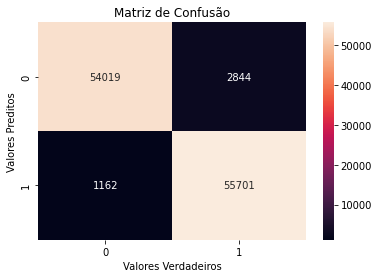

In [123]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_val.reshape(-1),y_val_pred_percentile))

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

Balanced Accuracy score: 0.9138


,precision,recall,f1-score,support
0.0,0.999778,0.948824,0.973635,56863.000000
1.0,0.029029,0.878788,0.056202,99.000000
accuracy,0.948703,0.948703,0.948703,0.948703
macro avg,0.514403,0.913806,0.514918,56962.000000
weighted avg,0.998090,0.948703,0.972040,56962.000000


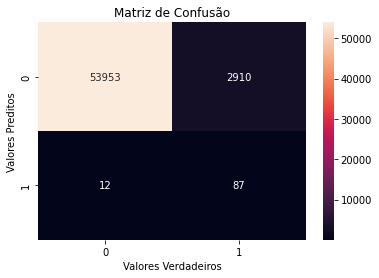

In [124]:
print("**************Dados de Teste**************\n")
print("Balanced Accuracy score: %1.4f"%balanced_accuracy_score(y_test.reshape(-1),y_test_pred_percentile))

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### Conclusões para ANN

*************************   Dados de Teste   *************************


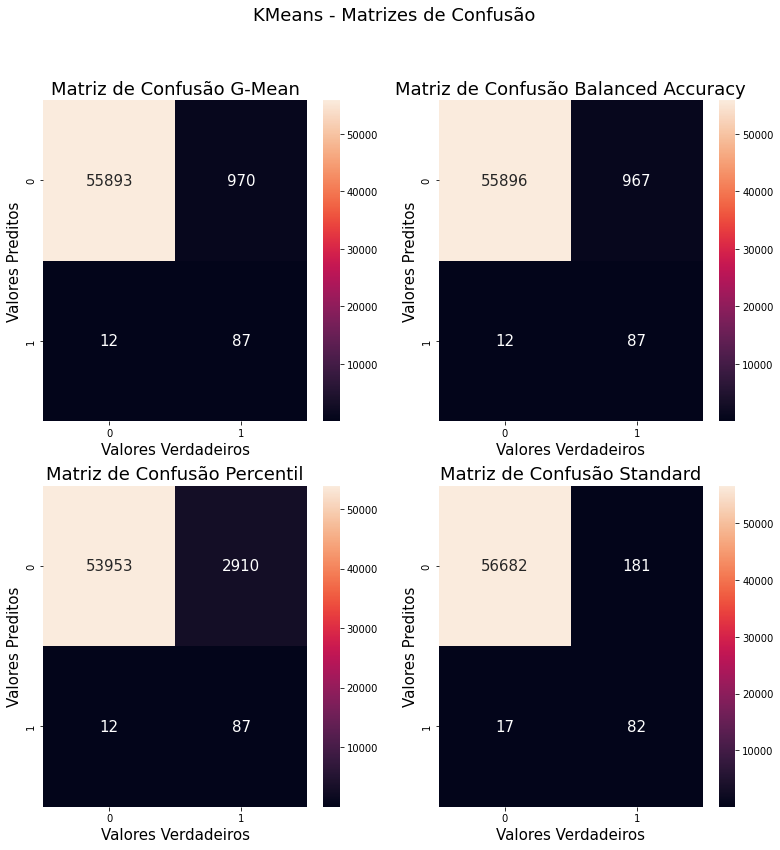

In [125]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
import json

num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(2,2)
fig.set_size_inches(6.5*2,6.5*2)
axes = axes.ravel()

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão G-Mean',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# Balanced Accuracy
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_bal_acc,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Balanced Accuracy',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)



# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_percentile,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Percentil',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)


y_test_pred_std = (test_prob>=0.5)

# Percentil
ax = axes[3]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Standard',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)

fig.suptitle("KMeans - Matrizes de Confusão",fontsize=18)


AUC_ROC = roc_auc_score(y_test,test_prob)


average_precision = average_precision_score(y_test,test_prob)




performance = {"AUC ROC":AUC_ROC,"Average Precision": average_precision,
                "Classification Report G-Mean":classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True),
                "Classification Report Balanced Accuracy":classification_report(y_test.reshape(-1),y_test_pred_bal_acc,digits=2,output_dict=True),
                "Classification Report Percentil":classification_report(y_test.reshape(-1),y_test_pred_percentile,digits=2,output_dict=True)}
with open("performance/performance_ANN.json","w",encoding="utf-8") as f:
    json.dump(performance,f)


fig.patch.set_alpha(1.0)
fig.savefig('figures/part3/confusion_matrix_ANN.pdf', bbox_inches='tight')
fig.savefig('figures/part3/confusion_matrix_ANN.png', bbox_inches='tight')
plt.show()

# Conclusão

Este modelo tem uma performance superior aos algoritmos base, K-Means e IsolationForest, e performance comparável com os modelos ``SGDClassifier``. Esta abordagem parece promissora para implementação.